# Heatmap

Hi and welcome to the class. Today, we will create a heatmap. If you are not sure about what heapmap is, it is a chart that helps measure intensity or power of numbers and it is hardly good for color-blinds. Because heatmap assigns color from min to max or on a scaled range.

If it is starting to sound confusing, let's move to practice

In [109]:
# import required packages
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [110]:
'''
We will use cryptocurrency dataset
'''

d = pd.read_csv('Data/altcoins.csv')
d.head()

,Date,BTC,ETH,ETC,ZEC,DASH,LTC
0,4/28/2013,134.21,NaN,NaN,NaN,NaN,4.35
1,4/29/2013,144.54,NaN,NaN,NaN,NaN,4.38
2,4/30/2013,139.00,NaN,NaN,NaN,NaN,4.30
3,5/1/2013,116.99,NaN,NaN,NaN,NaN,3.80
4,5/2/2013,105.21,NaN,NaN,NaN,NaN,3.37


It is advisable to get rid off NaN number values, otherwise, they will be colored white, and you don't want to spot empty slots in your heatmap. 

In [111]:
d.dropna(inplace=True)

What we want to capture in our heatmap is a price correlation of altcoins. Just a word of advise, your probably want to capture the correlation of returns, not a nominal prices. Since the focus of this course is not about explaining statistcs, let's not delve into it, and just take price correlation. Ok?!

In [112]:
# Correlation dataframe
cor_df = d.corr()
cor_df

,BTC,ETH,ETC,ZEC,DASH,LTC
BTC,1.000000,0.863730,0.685694,0.279518,0.910701,0.900221
ETH,0.863730,1.000000,0.928090,0.391908,0.917122,0.943395
ETC,0.685694,0.928090,1.000000,0.384311,0.772624,0.859662
ZEC,0.279518,0.391908,0.384311,1.000000,0.302269,0.340220
DASH,0.910701,0.917122,0.772624,0.302269,1.000000,0.948427
LTC,0.900221,0.943395,0.859662,0.340220,0.948427,1.000000


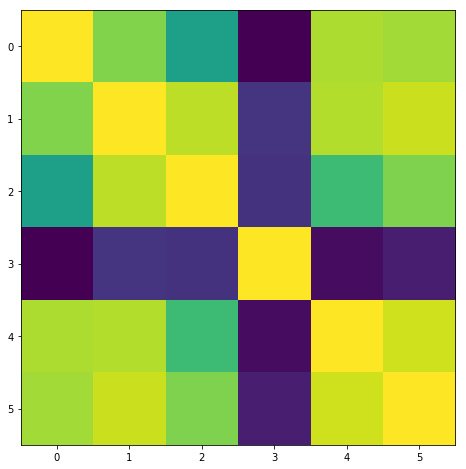

In [113]:
'''
Now we are ready to  make a heatmap
'''

fig, ax = plt.subplots(figsize=(8,8))

cax = ax.imshow(cor_df.values)


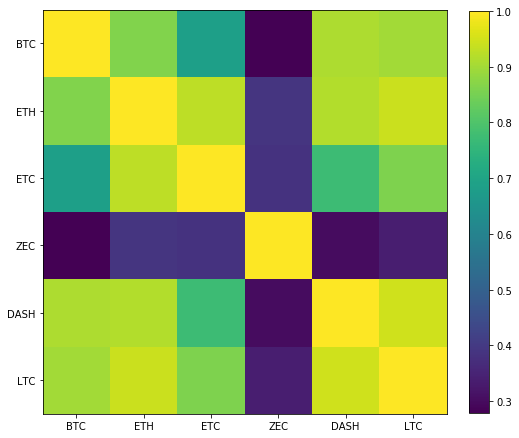

In [114]:
'''
Let's make it more descriptive
'''

ax.set_xticklabels(d.columns)
ax.set_yticklabels(d.columns)
fig.colorbar(cax, fraction=0.045)
fig

Looking at the dark cells, we can say that ZEC for example, has a very week correlation with BTC and vice versa. If you look at the colorbar, you can approximate the correlation coefficient to something 0.3 or below. Remember, 1 means a very strong correlation and 0 being No correlation at all.

If you still need more precision, then you overlay the values on the image. 

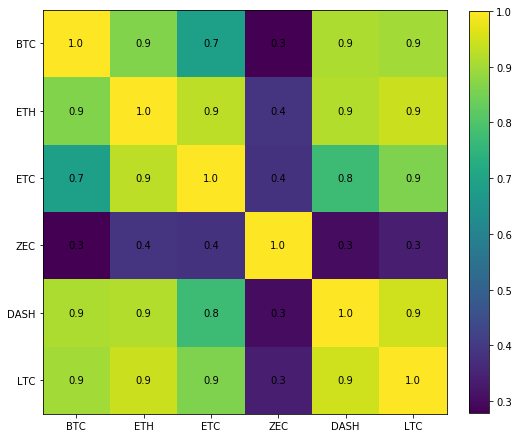

In [115]:
import numpy as np

for (i, j), t in np.ndenumerate(cor_df):
    ax.annotate("{:.1f}".format(t), xy=(i,j), va='center', ha='center')
    
fig

Speaking of colorbar, if you want know more about things you can do with it, just call help function like here

In [116]:
help(fig.colorbar)

Help on method colorbar in module matplotlib.figure:

colorbar(mappable, cax=None, ax=None, use_gridspec=True, **kw) method of matplotlib.figure.Figure instance
    Create a colorbar for a ScalarMappable instance, *mappable*.
    
    Documentation for the pylab thin wrapper:
    
    
    Add a colorbar to a plot.
    
    Function signatures for the :mod:`~matplotlib.pyplot` interface; all
    but the first are also method signatures for the
    :meth:`~matplotlib.figure.Figure.colorbar` method::
    
      colorbar(**kwargs)
      colorbar(mappable, **kwargs)
      colorbar(mappable, cax=cax, **kwargs)
      colorbar(mappable, ax=ax, **kwargs)
    
    Parameters
    ----------
    mappable :
        The :class:`~matplotlib.image.Image`,
        :class:`~matplotlib.contour.ContourSet`, etc. to
        which the colorbar applies; this argument is mandatory for the Figure
        :meth:`~matplotlib.figure.Figure.colorbar` method but optional for the
        pyplot :func:`~matplotlib.p

If you are not sure about numpy's ndenumarate method, just call the help it describes it pretty well, with an example.

In [117]:
help(np.ndenumerate)

Help on class ndenumerate in module numpy.lib.index_tricks:

class ndenumerate(builtins.object)
 |  Multidimensional index iterator.
 |  
 |  Return an iterator yielding pairs of array coordinates and values.
 |  
 |  Parameters
 |  ----------
 |  arr : ndarray
 |    Input array.
 |  
 |  See Also
 |  --------
 |  ndindex, flatiter
 |  
 |  Examples
 |  --------
 |  >>> a = np.array([[1, 2], [3, 4]])
 |  >>> for index, x in np.ndenumerate(a):
 |  ...     print(index, x)
 |  (0, 0) 1
 |  (0, 1) 2
 |  (1, 0) 3
 |  (1, 1) 4
 |  
 |  Methods defined here:
 |  
 |  __init__(self, arr)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __iter__(self)
 |  
 |  __next__(self)
 |      Standard iterator method, returns the index tuple and array value.
 |      
 |      Returns
 |      -------
 |      coords : tuple of ints
 |          The indices of the current iteration.
 |      val : scalar
 |          The array element of the current iteration.
 |  
 |  next = __ne

Alright, that's all about heatmap and colorbars. if you have any questions, do let me know and bye for now.